<a href="https://colab.research.google.com/github/federicoding/TrainingGeneral/blob/main/MiniExam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Examen

Ceci est un raisonnement type pour un mini-examen

Ici c'est basé sur heart_disease.csv.

Même si, ici, je passe sur le chargement des données.

Start

In [2]:
#le package classique, pour commencer

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import

In [3]:
url = 'https://raw.githubusercontent.com/federicoding/TrainingGeneral/main/heart.csv'

df = pd.read_csv(filepath_or_buffer=url, sep=',', header=0)

Premier check

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Patient le plus agé malade?
Le plus jeune comment va?

In [10]:
print(df.loc[df.age.idxmax()]) #Target à zéro, donc non malade

age          77.0
sex           1.0
cp            0.0
trestbps    125.0
chol        304.0
fbs           0.0
restecg       0.0
thalach     162.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            3.0
thal          2.0
target        0.0
Name: 238, dtype: float64


In [11]:
df.loc[df.age.idxmin(),'target'] #1 donc malade :/

1

Comparaison proportion malades et non malades entre sexes

In [12]:
df.groupby('sex').target.value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

Remplacement de variables (s'il y a lieu, car ici non)

In [ ]:
#df.sex = df.sex.replace(['Male', 'Female'], [0,1])

Fouillet et bidouille d'une valeur abérrante

In [13]:
df[(df.thalach>250) | (df.thalach<50)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Ici il n'y en a pas, sinon remplacement.

Valeurs manquantes

In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Le dataset est clean, vraiment.

Sinon, on supprime

In [15]:
df = df.dropna(subset=['target'])

Remplacement de valeurs manquantes dans variables qualitatives codées quantitativement. (`ca` et `exang`)

In [16]:
df.ca.fillna(df.ca.mode()[0], inplace=True)

df.exang.fillna(df.exang.mode()[0], inplace=True)

Pour les autres colonnes on remplace par les moyennes

In [17]:
df = df.fillna(df.mean())

Séparation en un `DataFrame` **X** pour les variables explicatives et **y** pour la variable cible.

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)

y = df.target

Vu les *ranges* (/!\ y penser!!) il vaut mieux **normer** les variables!

In [19]:
X_norm = X.apply(lambda x : (x-x.min())/(x.max() - x.min()))

**Apprentissage** *rapide* sur **3** modèles de classification, vite fait..

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = 10)

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluation du modèle de classification

On va afficher le taux de bonnes prédictions du modèle sur l'échantillon de test, ainsi que la matrice de confusion obtenue à partir des prédictions du modèle.

In [21]:
svm_clf.score(X_test, y_test)

0.7692307692307693

In [22]:
predictions = svm_clf.predict(X_test)

pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,33,17
1,4,37


Métriques supplémentaires

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76        50
           1       0.69      0.90      0.78        41

    accuracy                           0.77        91
   macro avg       0.79      0.78      0.77        91
weighted avg       0.80      0.77      0.77        91



Ici après, c'est juste de la bidouille...

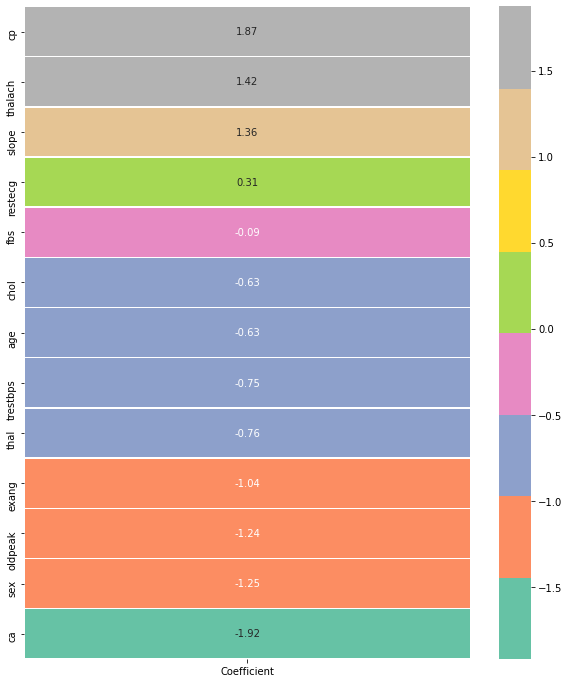

In [25]:
plt.figure(figsize=(10,12))

coefficients = pd.DataFrame(lr.coef_.ravel(),X.columns)

coefficients.columns = ['Coefficient']

coefficients.sort_values(by=['Coefficient'], inplace=True,ascending=False)

sns.heatmap(coefficients, annot=True, fmt='.2f', cmap='Set2', linewidths=0.5)